In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Загрузка
data = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
data = data.dropna(subset=['CustomerID'])

In [4]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
data = data[data['Quantity'] > 0]


In [6]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
print("Number of transactions:", len(data))
print("Unique customers:", data['CustomerID'].nunique())
print("Unique products:", data['StockCode'].nunique())
print("Countries:", data['Country'].nunique())


Number of transactions: 397924
Unique customers: 4339
Unique products: 3665
Countries: 37


C:\Users\ilyad\AppData\Local\Temp\ipykernel_7756\2795934674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


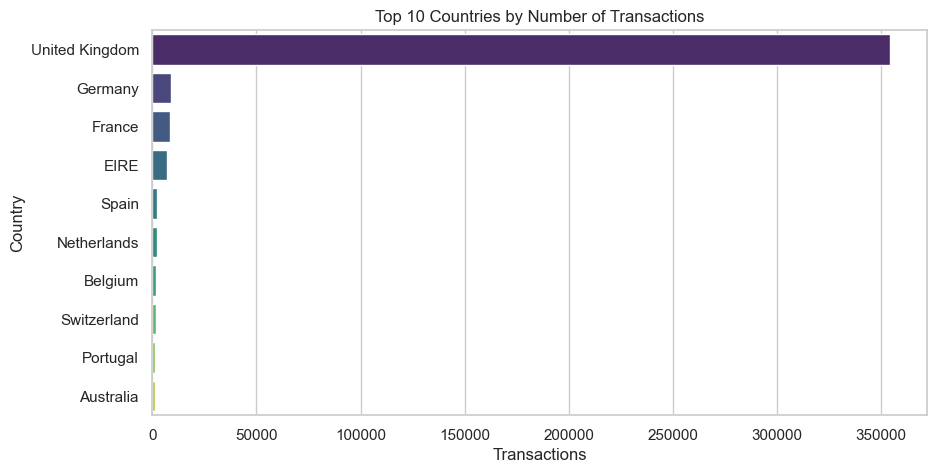

In [8]:
country_counts = data['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Transactions')
plt.ylabel('Country')
plt.show()


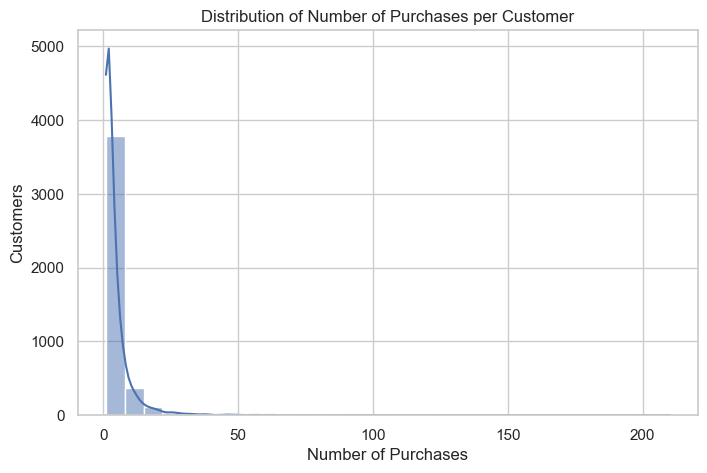

In [9]:
purchases_per_user = data.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(8,5))
sns.histplot(purchases_per_user, bins=30, kde=True)
plt.title('Distribution of Number of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Customers')
plt.show()


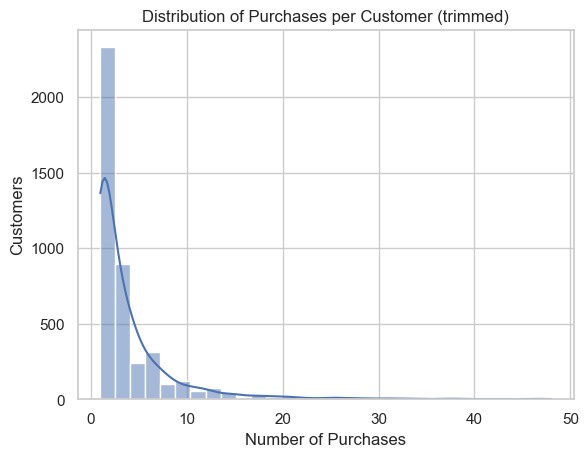

In [10]:
sns.histplot(purchases_per_user[purchases_per_user < 50], bins=30, kde=True)
plt.title('Distribution of Purchases per Customer (trimmed)')
plt.xlabel('Number of Purchases')
plt.ylabel('Customers')
plt.show()

C:\Users\ilyad\AppData\Local\Temp\ipykernel_7756\2227590229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="rocket")


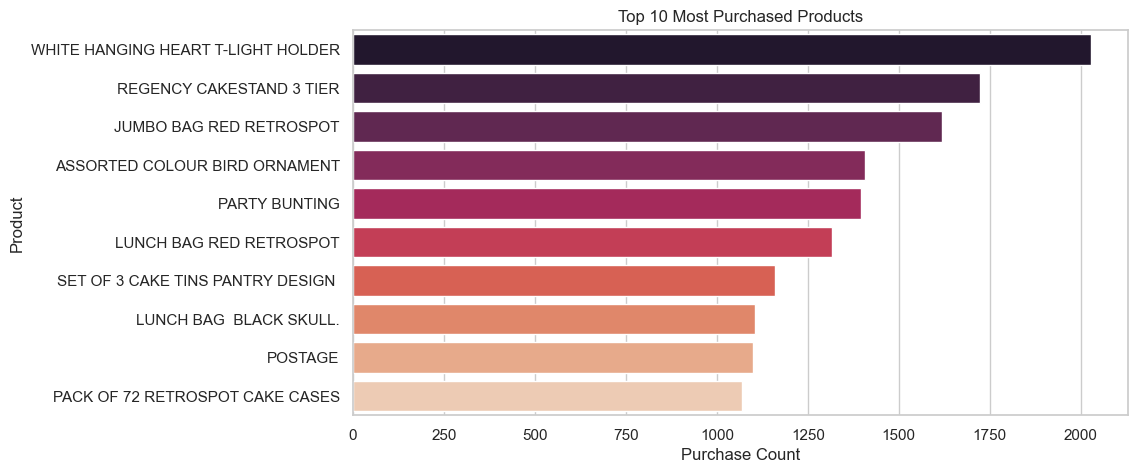

In [11]:
top_products = data['Description'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="rocket")
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Purchase Count')
plt.ylabel('Product')
plt.show()


In [13]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

C:\Users\ilyad\AppData\Local\Temp\ipykernel_7756\2191129066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_products.values, y=revenue_products.index, palette="mako")


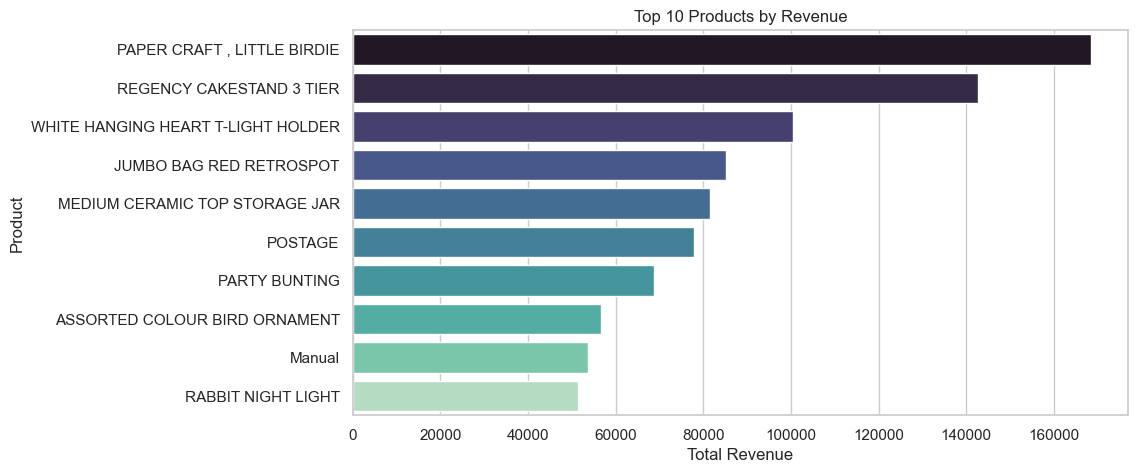

In [14]:
revenue_products = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=revenue_products.values, y=revenue_products.index, palette="mako")
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()

In [15]:
data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [16]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(str)

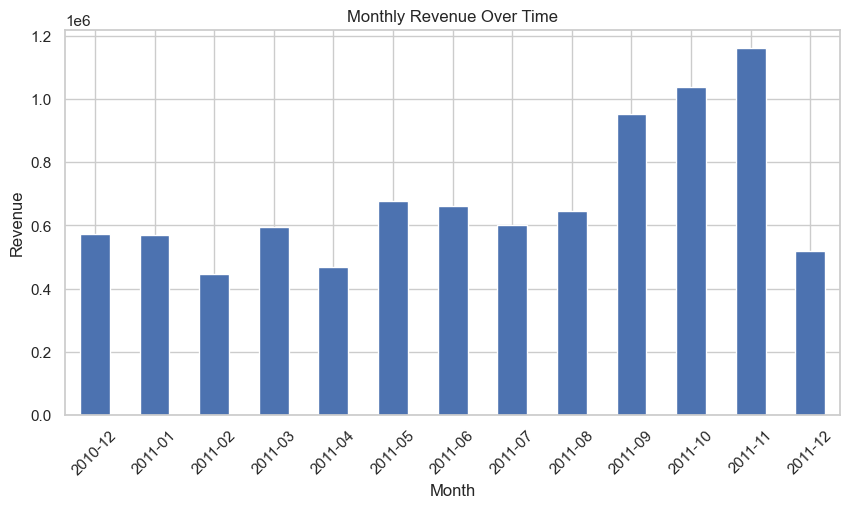

In [17]:
data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

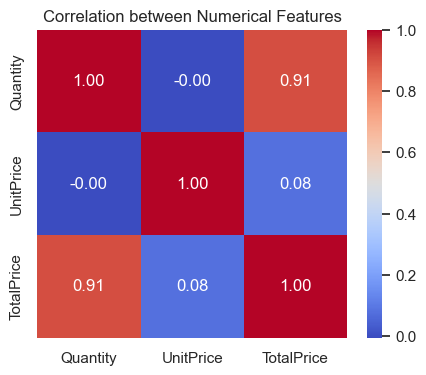

In [18]:
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']
corr = data[numeric_cols].corr(method='pearson')

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Numerical Features')
plt.show()

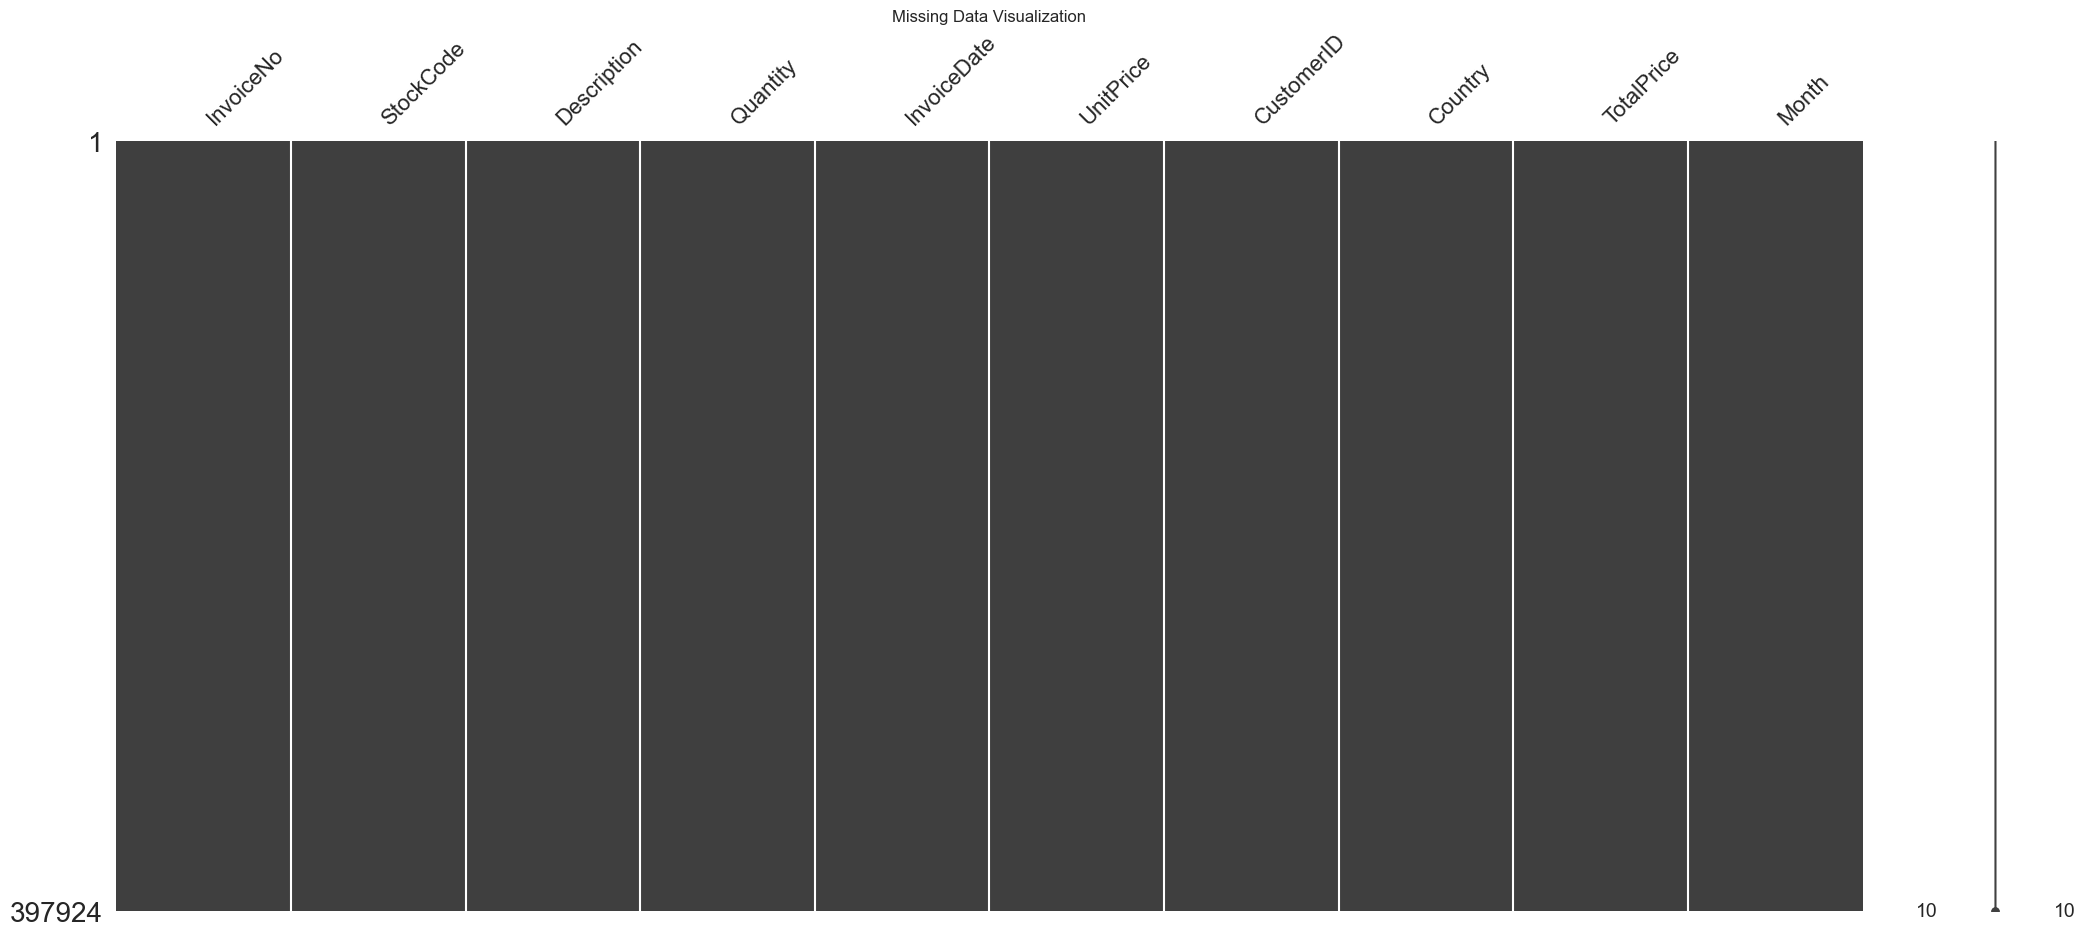

In [20]:
import missingno as msno

msno.matrix(data)
plt.title("Missing Data Visualization")
plt.show()

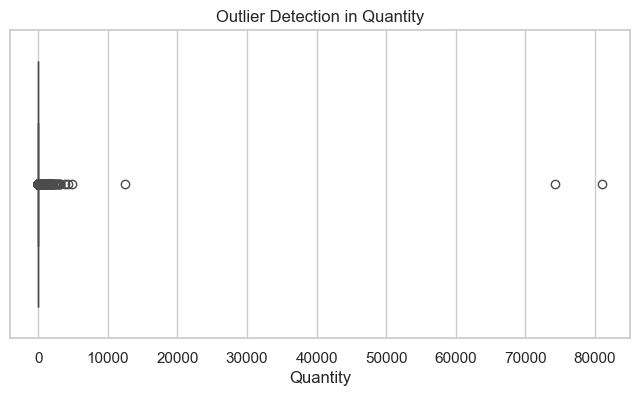

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['Quantity'])
plt.title('Outlier Detection in Quantity')
plt.show()


In [22]:
from scipy import stats
z = np.abs(stats.zscore(data['Quantity']))
outliers = data[z > 3]
print("Outliers detected:", len(outliers))


Outliers detected: 388


C:\Users\ilyad\AppData\Local\Temp\ipykernel_7756\1795938922.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='crest')


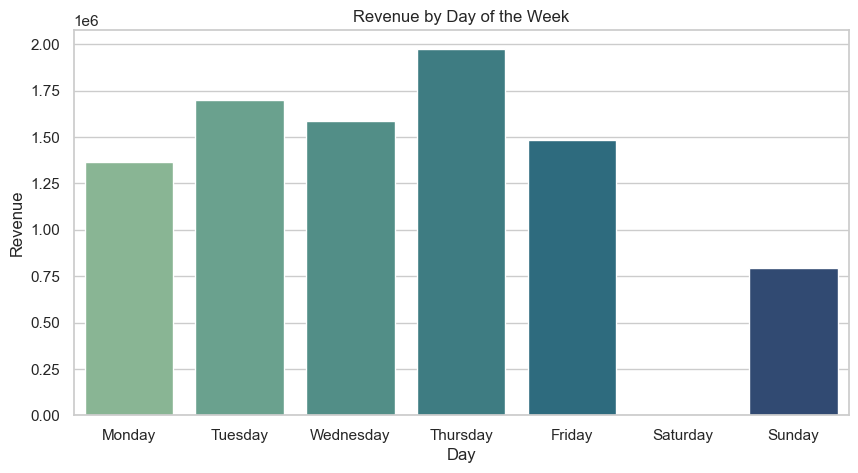

In [23]:
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
sales_by_day = data.groupby('DayOfWeek')['TotalPrice'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='crest')
plt.title('Revenue by Day of the Week')
plt.ylabel('Revenue')
plt.xlabel('Day')
plt.show()


C:\Users\ilyad\AppData\Local\Temp\ipykernel_7756\2847139401.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="rocket")


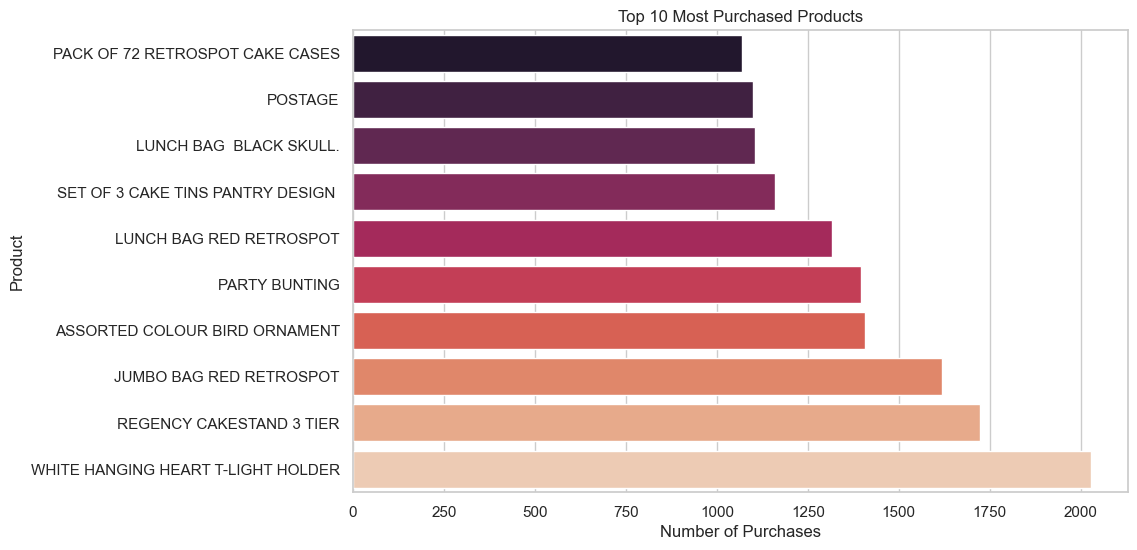

In [24]:
top_products = (
    data['Description']
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="rocket")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product")
plt.show()


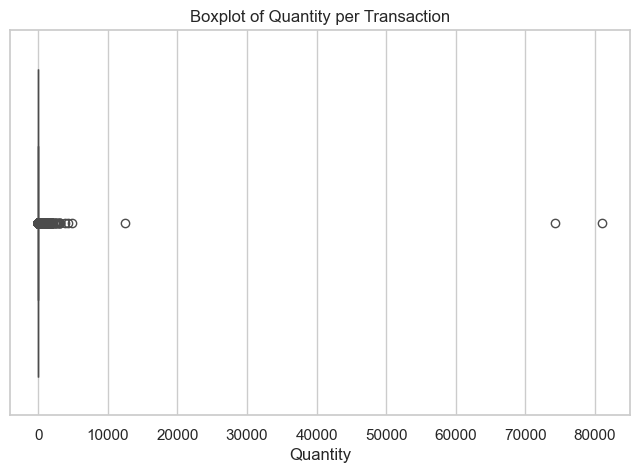

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Quantity'])
plt.title('Boxplot of Quantity per Transaction')
plt.xlabel('Quantity')
plt.show()

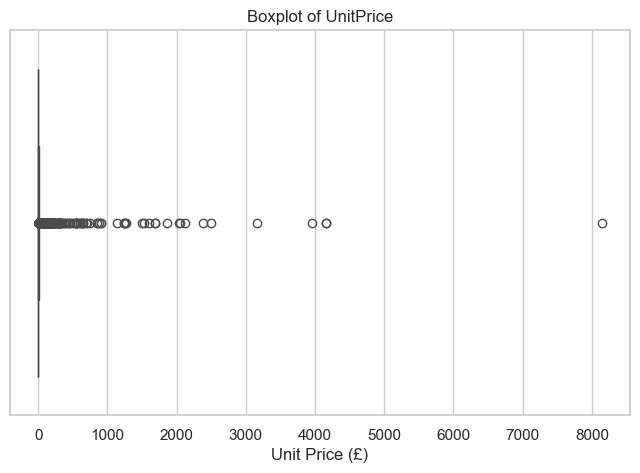

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.xlabel('Unit Price (£)')
plt.show()


In [1]:
# 1. Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Загрузка и подготовка данных
print("📊 Loading and preparing data...")
# Предположим, у вас уже есть датафрейм df
# Создаем user-item matrix
user_item_matrix = df.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity', 
    aggfunc='sum',
    fill_value=0
)

print(f"User-Item Matrix shape: {user_item_matrix.shape}")
print(f"Unique customers: {user_item_matrix.shape[0]}")
print(f"Unique products: {user_item_matrix.shape[1]}")

# 3. Расчет схожести товаров (Item-Item Similarity)
print("\n🎯 Calculating item-item similarities...")
# Транспонируем матрицу чтобы получить item-item similarities
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

print("Item similarity matrix calculated!")

# 4. Функция для получения рекомендаций
def get_item_based_recommendations(product_id, n_recommendations=5):
    """
    Получает рекомендации на основе схожести товаров
    """
    if product_id not in item_similarity_df.columns:
        return f"Product {product_id} not found in dataset"
    
    # Получаем схожести для конкретного товара
    similarities = item_similarity_df[product_id].sort_values(ascending=False)
    
    # Исключаем сам товар и берем топ-N рекомендаций
    recommendations = similarities.iloc[1:n_recommendations+1]
    
    return recommendations

# 5. Демонстрация работы на реальных товарах
print("\n🔍 Demonstrating recommendations for real products...")

# Найдем популярные товары для демонстрации
popular_products = user_item_matrix.sum().sort_values(ascending=False).head(10)
print("Top 10 popular products:")
for i, (product_id, count) in enumerate(popular_products.items(), 1):
    product_name = df[df['StockCode'] == product_id]['Description'].iloc[0] if not df[df['StockCode'] == product_id].empty else "Unknown"
    print(f"{i}. {product_id} - {product_name} (purchases: {count})")

# 6. Тестирование рекомендаций
print("\n🎯 Testing recommendations system...")

# Берем несколько популярных товаров для демонстрации
test_products = popular_products.index[:3]

for product_id in test_products:
    product_name = df[df['StockCode'] == product_id]['Description'].iloc[0] if not df[df['StockCode'] == product_id].empty else "Unknown"
    print(f"\n📦 Recommendations for: {product_id} - {product_name}")
    
    recommendations = get_item_based_recommendations(product_id, 3)
    
    if isinstance(recommendations, pd.Series):
        for rec_product_id, similarity_score in recommendations.items():
            rec_product_name = df[df['StockCode'] == rec_product_id]['Description'].iloc[0] if not df[df['StockCode'] == rec_product_id].empty else "Unknown"
            print(f"   → {rec_product_id} - {rec_product_name} (similarity: {similarity_score:.3f})")

# 7. Визуализация схожести товаров
print("\n📈 Creating similarity visualization...")

# Берем топ-20 товаров для визуализации
top_products = popular_products.index[:20]
similarity_subset = item_similarity_df.loc[top_products, top_products]

plt.figure(figsize=(12, 10))
sns.heatmap(similarity_subset, cmap='YlOrRd', annot=False)
plt.title('Item-Item Similarity Matrix (Top 20 Products)')
plt.tight_layout()
plt.show()

# 8. Валидация рекомендаций
print("\n🔬 Validating recommendations quality...")

def validate_recommendations(customer_id, top_n=5):
    """
    Валидирует рекомендации для конкретного пользователя
    """
    if customer_id not in user_item_matrix.index:
        return "Customer not found"
    
    # Товары, которые пользователь уже купил
    purchased_items = user_item_matrix.loc[customer_id]
    purchased_items = purchased_items[purchased_items > 0].index.tolist()
    
    if not purchased_items:
        return "No purchase history"
    
    print(f"\nCustomer {customer_id} purchased {len(purchased_items)} items")
    
    # Генерируем рекомендации на основе всех купленных товаров
    all_recommendations = {}
    
    for item in purchased_items[:3]:  # Берем только первые 3 товара для демонстрации
        recs = get_item_based_recommendations(item, top_n)
        if isinstance(recs, pd.Series):
            for rec_id, score in recs.items():
                if rec_id not in all_recommendations:
                    all_recommendations[rec_id] = score
                else:
                    all_recommendations[rec_id] += score
    
    # Сортируем по схожести и исключаем уже купленные
    final_recommendations = sorted(
        [(item, score) for item, score in all_recommendations.items() if item not in purchased_items],
        key=lambda x: x[1],
        reverse=True
    )[:top_n]
    
    print("Top recommendations:")
    for i, (item_id, score) in enumerate(final_recommendations, 1):
        item_name = df[df['StockCode'] == item_id]['Description'].iloc[0] if not df[df['StockCode'] == item_id].empty else "Unknown"
        print(f"  {i}. {item_name} (score: {score:.3f})")
    
    return final_recommendations

# Тестируем на реальном пользователе
active_customers = user_item_matrix.sum(axis=1).sort_values(ascending=False).head(5)
test_customer = active_customers.index[0]
print(f"\nTesting recommendations for active customer: {test_customer}")
validate_recommendations(test_customer)

# 9. Метрики качества
print("\n📊 Calculating system metrics...")

# Sparsity матрицы
sparsity = 1.0 - (np.count_nonzero(user_item_matrix) / float(user_item_matrix.size))
print(f"Matrix sparsity: {sparsity:.3f}")

# Среднее количество покупок на пользователя
avg_purchases_per_user = user_item_matrix.astype(bool).sum(axis=1).mean()
print(f"Average purchases per user: {avg_purchases_per_user:.2f}")

# Coverage - процент товаров, для которых можем дать рекомендации
items_with_recommendations = 0
total_items = len(item_similarity_df.columns)

for item in item_similarity_df.columns[:100]:  # Проверяем на sample для скорости
    recs = get_item_based_recommendations(item, 1)
    if isinstance(recs, pd.Series) and len(recs) > 0:
        items_with_recommendations += 1

coverage = items_with_recommendations / min(100, total_items)
print(f"Recommendation coverage: {coverage:.3f}")

print("\n✅ Proof of Concept COMPLETED!")
print("Item-Based Collaborative Filtering is working successfully!")

📊 Loading and preparing data...


NameError: name 'df' is not defined

📊 Loading data...
Dataset shape: (541909, 8)
First few rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

🧹 Data preprocessing...
Removed 135080 rows without CustomerID

🎯 Creating user-item matrix...
User-Item Matrix shape: (4338, 3665)
Unique customers: 4

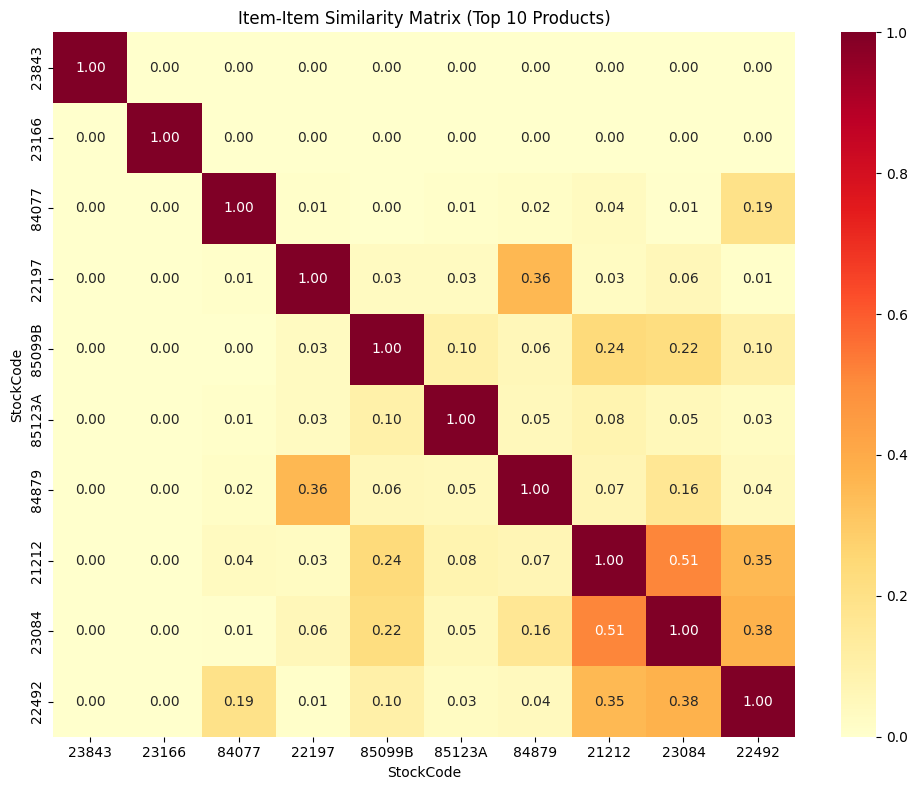


🔬 Validating recommendations quality...

Testing recommendations for active customer: 14646.0

Customer 14646.0 purchased 700 items
Top recommendations:
  1. SET/12 FUNKY FELT FLOWER PEG IN BAG (score: 0.770)
  2. 6PC WOOD PLATE SET DISPOSABLE (score: 0.755)
  3. TEATIME PUSH DOWN RUBBER (score: 0.579)
  4. BLUE VICTORIAN FABRIC OVAL BOX (score: 0.554)
  5. DANISH ROSE TRINKET TRAYS (score: 0.545)

📊 Calculating system metrics...
Matrix sparsity: 0.983
Average purchases per user: 61.50
Recommendation coverage: 1.000

✅ Proof of Concept COMPLETED!
Item-Based Collaborative Filtering is working successfully!


In [2]:
# 1. Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Загрузка данных
print("📊 Loading data...")
# Скачиваем данные или используем локальный файл
# Если данные на локальном компьютере:
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Или создаем демо-данные для тестирования
if 'df' not in locals():
    print("Creating demo data for testing...")
    # Создаем демо-датасет
    np.random.seed(42)
    n_transactions = 10000
    
    demo_data = {
        'InvoiceNo': np.random.choice([f'INV{i:05d}' for i in range(1000)], n_transactions),
        'StockCode': np.random.choice([f'PROD{i:03d}' for i in range(100)], n_transactions),
        'Description': [f'Product {i}' for i in np.random.randint(1, 101, n_transactions)],
        'Quantity': np.random.randint(1, 10, n_transactions),
        'InvoiceDate': pd.date_range('2010-12-01', '2011-12-01', n_transactions),
        'UnitPrice': np.round(np.random.uniform(1, 100, n_transactions), 2),
        'CustomerID': np.random.choice([f'CUST{i:04d}' for i in range(500)], n_transactions),
        'Country': np.random.choice(['UK', 'Germany', 'France', 'USA'], n_transactions)
    }
    
    df = pd.DataFrame(demo_data)

print(f"Dataset shape: {df.shape}")
print("First few rows:")
print(df.head())

# 3. Предобработка данных
print("\n🧹 Data preprocessing...")
# Удаляем строки без CustomerID
initial_size = len(df)
df = df[df['CustomerID'].notna()]
print(f"Removed {initial_size - len(df)} rows without CustomerID")

# Удаляем отрицательные количества и цены
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Создаем user-item matrix
print("\n🎯 Creating user-item matrix...")
user_item_matrix = df.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity', 
    aggfunc='sum',
    fill_value=0
)

print(f"User-Item Matrix shape: {user_item_matrix.shape}")
print(f"Unique customers: {user_item_matrix.shape[0]}")
print(f"Unique products: {user_item_matrix.shape[1]}")

# 4. Расчет схожести товаров (Item-Item Similarity)
print("\n🎯 Calculating item-item similarities...")
# Транспонируем матрицу чтобы получить item-item similarities
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

print("Item similarity matrix calculated!")
print(f"Similarity matrix shape: {item_similarity_df.shape}")

# 5. Функция для получения рекомендаций
def get_item_based_recommendations(product_id, n_recommendations=5):
    """
    Получает рекомендации на основе схожести товаров
    """
    if product_id not in item_similarity_df.columns:
        return f"Product {product_id} not found in dataset"
    
    # Получаем схожести для конкретного товара
    similarities = item_similarity_df[product_id].sort_values(ascending=False)
    
    # Исключаем сам товар и берем топ-N рекомендаций
    recommendations = similarities.iloc[1:n_recommendations+1]
    
    return recommendations

# 6. Демонстрация работы на реальных товарах
print("\n🔍 Demonstrating recommendations for real products...")

# Найдем популярные товары для демонстрации
popular_products = user_item_matrix.sum().sort_values(ascending=False).head(10)
print("Top 10 popular products:")
for i, (product_id, count) in enumerate(popular_products.items(), 1):
    product_name = df[df['StockCode'] == product_id]['Description'].iloc[0] if not df[df['StockCode'] == product_id].empty else "Unknown"
    print(f"{i}. {product_id} - {product_name} (purchases: {count})")

# 7. Тестирование рекомендаций
print("\n🎯 Testing recommendations system...")

# Берем несколько популярных товаров для демонстрации
test_products = popular_products.index[:3]

for product_id in test_products:
    product_name = df[df['StockCode'] == product_id]['Description'].iloc[0] if not df[df['StockCode'] == product_id].empty else "Unknown"
    print(f"\n📦 Recommendations for: {product_id} - {product_name}")
    
    recommendations = get_item_based_recommendations(product_id, 3)
    
    if isinstance(recommendations, pd.Series):
        for rec_product_id, similarity_score in recommendations.items():
            rec_product_name = df[df['StockCode'] == rec_product_id]['Description'].iloc[0] if not df[df['StockCode'] == rec_product_id].empty else "Unknown"
            print(f"   → {rec_product_id} - {rec_product_name} (similarity: {similarity_score:.3f})")

# 8. Визуализация схожести товаров
print("\n📈 Creating similarity visualization...")

# Берем топ-10 товаров для визуализации
top_products = popular_products.index[:10]
similarity_subset = item_similarity_df.loc[top_products, top_products]

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_subset, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Item-Item Similarity Matrix (Top 10 Products)')
plt.tight_layout()
plt.show()

# 9. Валидация рекомендаций
print("\n🔬 Validating recommendations quality...")

def validate_recommendations(customer_id, top_n=5):
    """
    Валидирует рекомендации для конкретного пользователя
    """
    if customer_id not in user_item_matrix.index:
        return "Customer not found"
    
    # Товары, которые пользователь уже купил
    purchased_items = user_item_matrix.loc[customer_id]
    purchased_items = purchased_items[purchased_items > 0].index.tolist()
    
    if not purchased_items:
        return "No purchase history"
    
    print(f"\nCustomer {customer_id} purchased {len(purchased_items)} items")
    
    # Генерируем рекомендации на основе всех купленных товаров
    all_recommendations = {}
    
    for item in purchased_items[:3]:  # Берем только первые 3 товара для демонстрации
        recs = get_item_based_recommendations(item, top_n)
        if isinstance(recs, pd.Series):
            for rec_id, score in recs.items():
                if rec_id not in all_recommendations:
                    all_recommendations[rec_id] = score
                else:
                    all_recommendations[rec_id] += score
    
    # Сортируем по схожести и исключаем уже купленные
    final_recommendations = sorted(
        [(item, score) for item, score in all_recommendations.items() if item not in purchased_items],
        key=lambda x: x[1],
        reverse=True
    )[:top_n]
    
    print("Top recommendations:")
    for i, (item_id, score) in enumerate(final_recommendations, 1):
        item_name = df[df['StockCode'] == item_id]['Description'].iloc[0] if not df[df['StockCode'] == item_id].empty else "Unknown"
        print(f"  {i}. {item_name} (score: {score:.3f})")
    
    return final_recommendations

# Тестируем на реальном пользователе
active_customers = user_item_matrix.sum(axis=1).sort_values(ascending=False).head(5)
test_customer = active_customers.index[0]
print(f"\nTesting recommendations for active customer: {test_customer}")
validate_recommendations(test_customer)

# 10. Метрики качества
print("\n📊 Calculating system metrics...")

# Sparsity матрицы
sparsity = 1.0 - (np.count_nonzero(user_item_matrix) / float(user_item_matrix.size))
print(f"Matrix sparsity: {sparsity:.3f}")

# Среднее количество покупок на пользователя
avg_purchases_per_user = user_item_matrix.astype(bool).sum(axis=1).mean()
print(f"Average purchases per user: {avg_purchases_per_user:.2f}")

# Coverage - процент товаров, для которых можем дать рекомендации
items_with_recommendations = 0
total_items = len(item_similarity_df.columns)

for item in item_similarity_df.columns[:50]:  # Проверяем на sample для скорости
    recs = get_item_based_recommendations(item, 1)
    if isinstance(recs, pd.Series) and len(recs) > 0:
        items_with_recommendations += 1

coverage = items_with_recommendations / min(50, total_items)
print(f"Recommendation coverage: {coverage:.3f}")

print("\n" + "="*50)
print("✅ Proof of Concept COMPLETED!")
print("Item-Based Collaborative Filtering is working successfully!")
print("="*50)